In [23]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import h5py
from load_data import voxelize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import BytesIO
from PIL import Image

def visualize_voxel(voxel_grid):
    """
    Visualizes a 3D binary voxel grid using matplotlib.

    Parameters:
    voxel_grid (numpy.ndarray): A 3D binary voxel grid where 1 indicates occupancy and 0 indicates empty.
    """

    # Get the coordinates of occupied voxels
    occupied_voxels = np.argwhere(voxel_grid > 0.24)

    # Create a 3D plot
    fig = plt.figure()
    plt.tight_layout()

    ax = fig.add_subplot(111, projection='3d')

    # Plot occupied voxels as scatter points with smaller size
    ax.scatter(occupied_voxels[:, 0], occupied_voxels[:, 2], occupied_voxels[:, 1], s=5)  # Adjust s for point size

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set the aspect ratio to be equal
    ax.set_box_aspect([1, 1, 1])

    # Set the limits for the axes
    ax.set_xlim([0, voxel_grid.shape[0]])
    ax.set_ylim([0, voxel_grid.shape[1]])
    ax.set_zlim([0, voxel_grid.shape[2]])
    
    ax.axis("off")
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)  # Move the buffer cursor to the beginning
    plt.close()
    # Convert the buffer into a Pillow Image
    img = Image.open(buf)
    return img


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# load the preprocessed voxel data.
voxels = np.load("./data/hdf5_data/chair_voxels_train.npy")
print(voxels.shape)

(2658, 64, 64, 64)


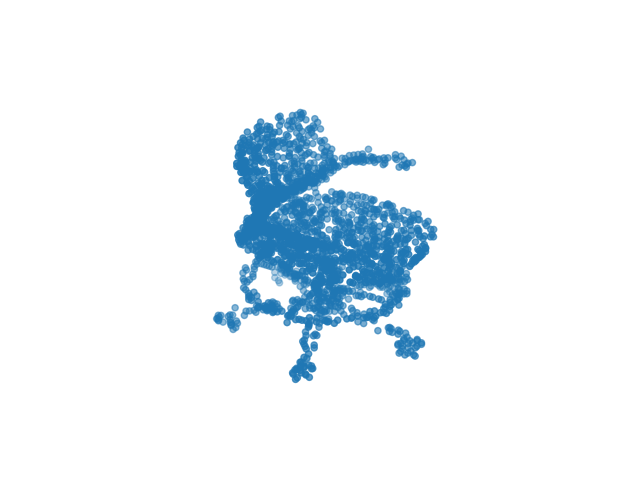

In [38]:
img = visualize_voxel(voxels[0])
display(img)

In [22]:
def visualize_voxel_prob(voxel_grid, prob=0.05):
    flattened_data = voxel_grid.flatten()
    sorted_data = np.sort(flattened_data)

    index = int((1-prob) * len(sorted_data))
    threshold = sorted_data[index]

    # Apply thresholding and reshape to match original dimensions
    voxel_grid = (voxel_grid > threshold).astype(int)

    # Visualization
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    occupied_voxels = np.argwhere(voxel_grid == 1)
    ax.scatter(occupied_voxels[:, 0], occupied_voxels[:, 2], occupied_voxels[:, 1])

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set the aspect ratio to be equal
    ax.set_box_aspect([1, 1, 1])

    # Set the limits for the axes
    ax.set_xlim([0, voxel_grid.shape[0]])
    ax.set_ylim([0, voxel_grid.shape[1]])
    ax.set_zlim([0, voxel_grid.shape[2]])
    
    ax.axis("off")
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)  # Move the buffer cursor to the beginning
    plt.close()
    # Convert the buffer into a Pillow Image
    img = Image.open(buf)
    return img

In [39]:
# load the preprocessed voxel data.
voxels_maxpool = np.load("./data/hdf5_data/chair_voxels_train_maxpool.npy")
print(voxels_maxpool.shape)

(2658, 32, 32, 32)


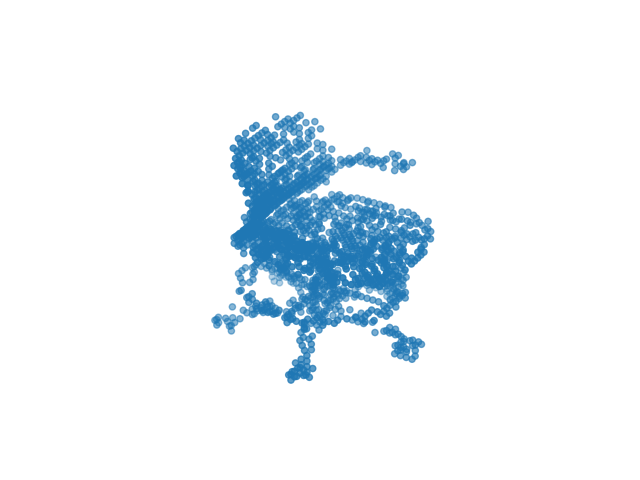

In [40]:
img = visualize_voxel(voxels_maxpool[0])
display(img)

In [43]:
# load the preprocessed voxel data.
voxels_avgpool = np.load("./data/hdf5_data/chair_voxels_train_avgpool.npy")
print(voxels_avgpool.shape)

(2658, 32, 32, 32)


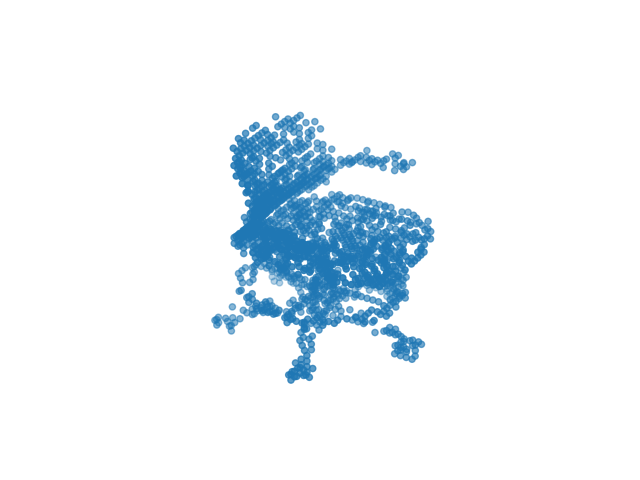

In [44]:
img = visualize_voxel_prob(voxels_avgpool[0])
display(img)

In [ ]:
# load the preprocessed voxel data.
voxels_gen = np.load("./samples/chair/chair_combined_data.npy")
print(voxels_gen.shape)

(1000, 32, 32, 32)


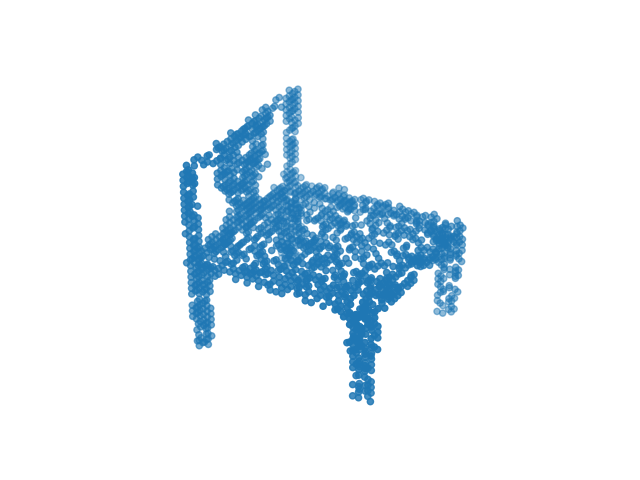

In [47]:
img = visualize_voxel_prob(voxels_gen[0])
display(img)

In [ ]:
# load the preprocessed voxel data.
voxels_output = np.load("chair_output.npy")
print(voxels_output.shape)

(1000, 64, 64, 64)


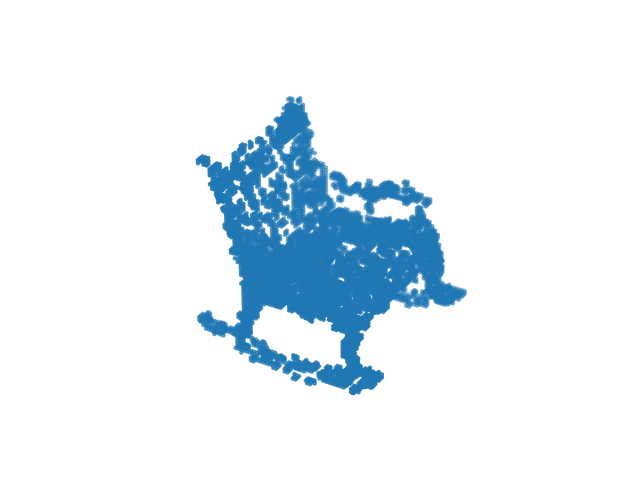

In [ ]:
img = visualize_voxel(voxels_output[0])
display(img)